# Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import chain

# Load Data

In [2]:
# Create pandas dataframe from csv
dfWT = pd.read_csv("../program/log/MainLogWithTarjan.csv", sep=",", header=0)
dfNT = pd.read_csv("../program/log/MainLogNoTarjan.csv", sep=",", header=0)
dfMinMaxK = pd.read_csv("../program/log/OverviewMinMaxK.csv", sep=",", header=0)
dfSolutions = pd.read_csv("../inputs/optimal_solution_sizes.csv", sep=",", header=0)
dfNandMCount = pd.read_csv("../program/log/NodesAndEdgesCount.csv", sep=",", header=0)

# Merge
dfWT = dfWT.merge(dfSolutions, on = "name", how = 'inner')
dfNT = dfNT.merge(dfSolutions, on = "name", how = 'inner')
dfWT = dfWT.merge(dfNandMCount, on = "name", how = 'inner')
dfNT = dfNT.merge(dfNandMCount, on = "name", how = 'inner')

# Replace
dfWT.loc[dfWT['verified'] != True, 'k'] = dfWT['optimalK']
dfNT.loc[dfNT['verified'] != True, 'k'] = dfNT['optimalK']

# Filter
dfWT = dfWT[dfWT['k'] <= 20]
dfNT = dfNT[dfNT['k'] <= 20]

# Mean
dfWT_mean_k = dfWT.groupby('k').mean()
dfNT_mean_k = dfNT.groupby('k').mean()
dfWT_mean_n = dfWT.groupby('n').mean()
dfNT_mean_n = dfNT.groupby('n').mean()
dfWT_mean_m = dfWT.groupby('m').mean()
dfNT_mean_m = dfNT.groupby('m').mean()

# Boxplot

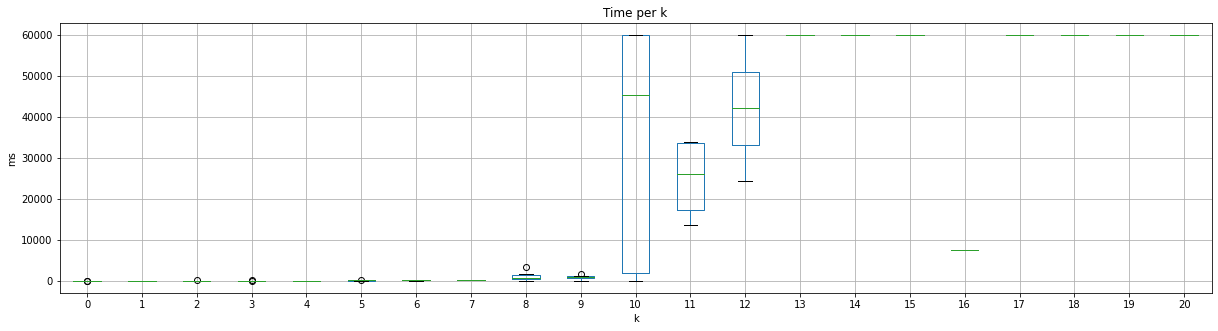

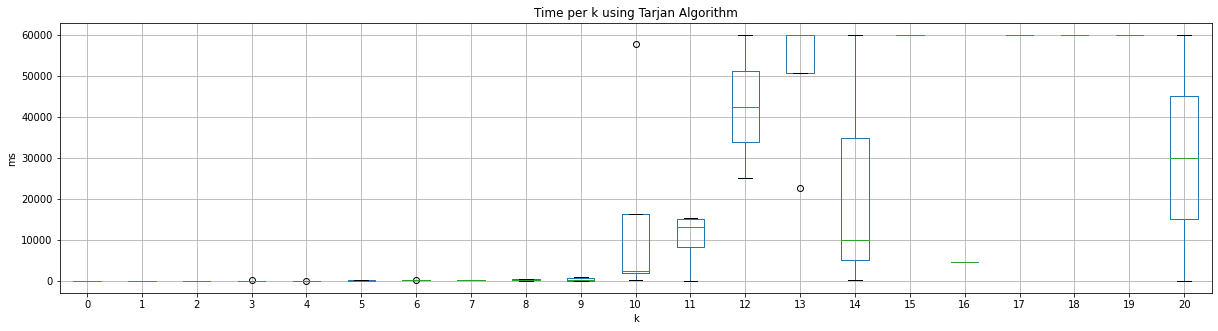

In [3]:
# Without Tarjan
axes = dfNT.boxplot(column='millis', by='k', figsize=(20,5))
fig = axes.get_figure().suptitle('')
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k')
plt.savefig('plots/TimeBoxPlotNoTarjan.png',  bbox_inches='tight')
plt.show()

# With Tarjan
axes = dfWT.boxplot(column='millis', by='k', figsize=(20,5))
fig = axes.get_figure().suptitle('')
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k using Tarjan Algorithm')
plt.savefig('plots/TimeBoxPlotWithTarjan.png',  bbox_inches='tight')
plt.show()

# Line Plot for k

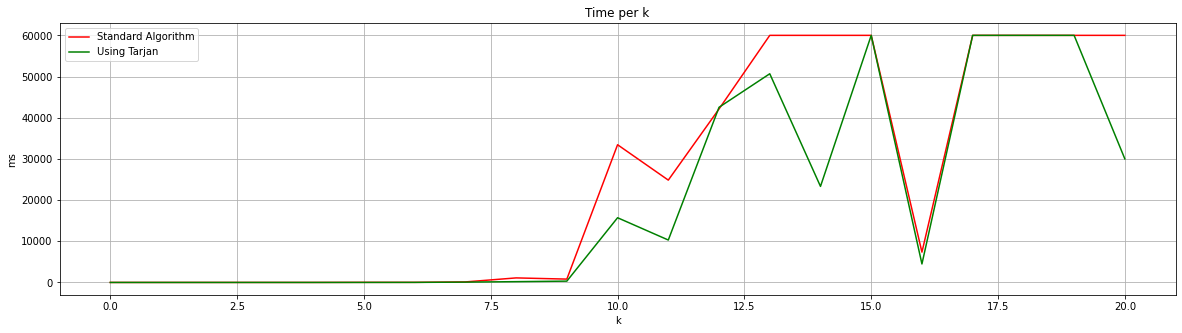

In [4]:
plt.figure(figsize=(20,5))
plt.plot(dfNT_mean_k['millis'], c='Red', label="Standard Algorithm")
plt.plot(dfWT_mean_k['millis'], c='Green', label="Using Tarjan")
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k')
plt.grid()
plt.legend()
plt.savefig('plots/TimePerKLinePlotCombined.png',  bbox_inches='tight')
plt.show()

# Line Plots for n

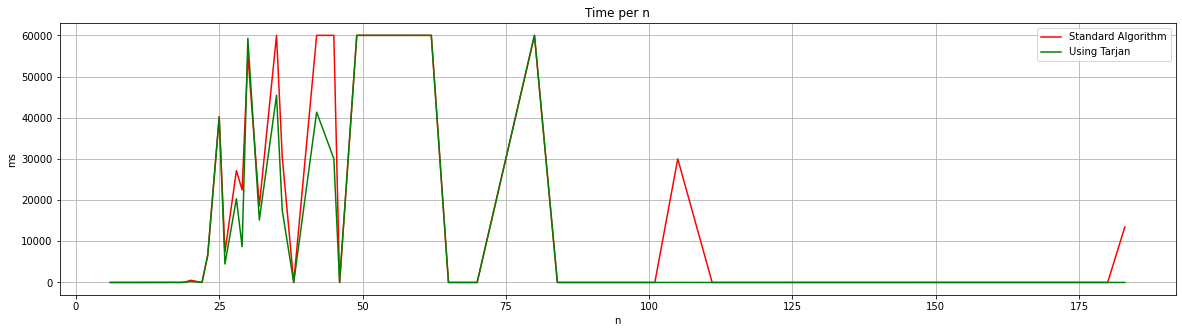

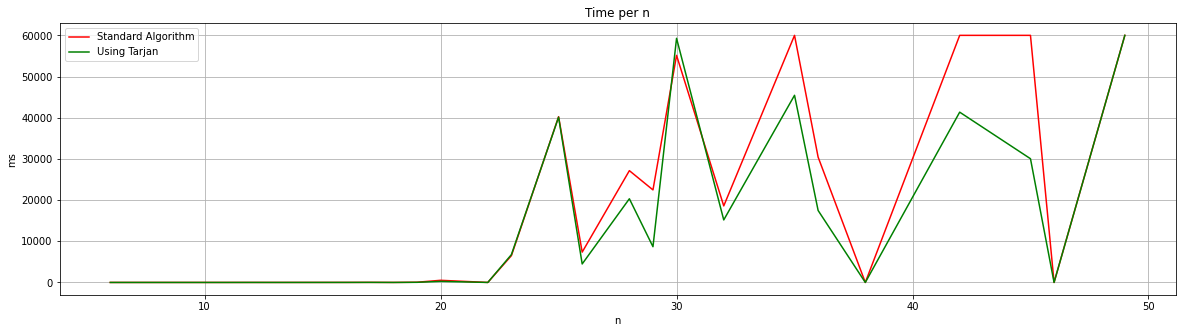

In [5]:
plt.figure(figsize=(20,5))
plt.plot(dfNT_mean_n['millis'], c='Red', label="Standard Algorithm")
plt.plot(dfWT_mean_n['millis'], c='Green', label="Using Tarjan")
plt.xlabel('n')
plt.ylabel('ms')
plt.title('Time per n')
plt.grid()
plt.legend()
plt.savefig('plots/TimePerNLinePlotCombined.png',  bbox_inches='tight')
plt.show()

dfNT_mean_n_cropped = dfNT_mean_n[dfNT_mean_n.index <= 50]
dfWT_mean_n_cropped = dfWT_mean_n[dfWT_mean_n.index <= 50]

plt.figure(figsize=(20,5))
plt.plot(dfNT_mean_n_cropped['millis'], c='Red', label="Standard Algorithm")
plt.plot(dfWT_mean_n_cropped['millis'], c='Green', label="Using Tarjan")
plt.xlabel('n')
plt.ylabel('ms')
plt.title('Time per n')
plt.grid()
plt.legend()
plt.savefig('plots/TimePerNLinePlotCombinedCropped.png',  bbox_inches='tight')
plt.show()

# Line Plots for m

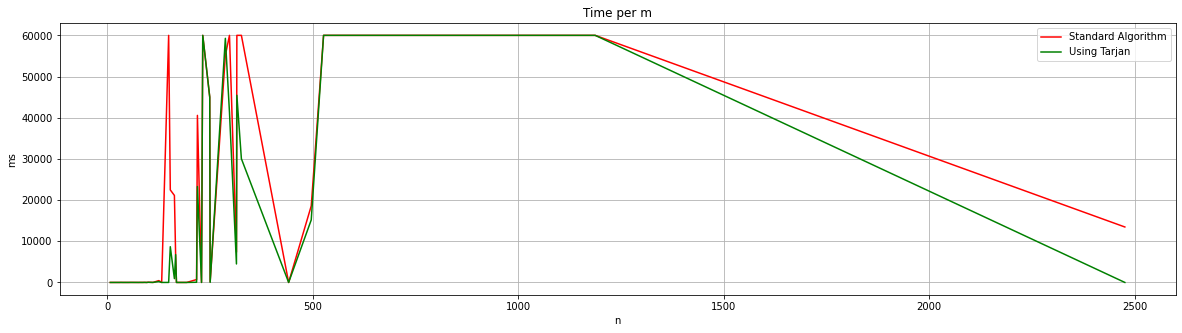

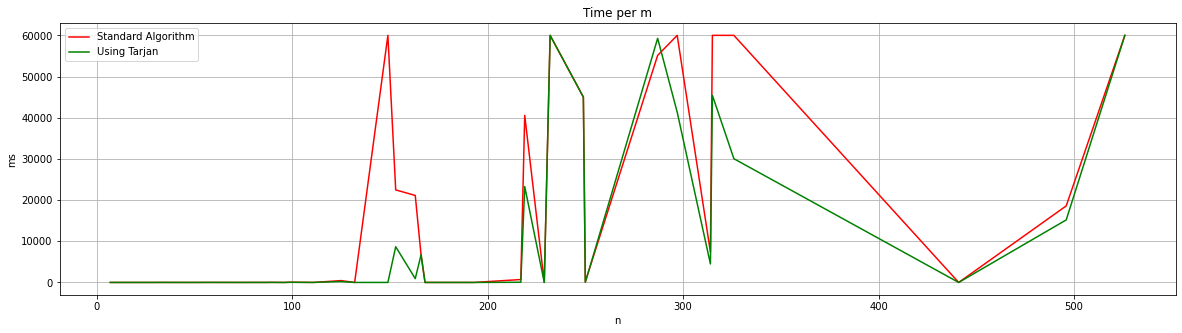

In [6]:
plt.figure(figsize=(20,5))
plt.plot(dfNT_mean_m['millis'], c='Red', label="Standard Algorithm")
plt.plot(dfWT_mean_m['millis'], c='Green', label="Using Tarjan")
plt.xlabel('n')
plt.ylabel('ms')
plt.title('Time per m')
plt.grid()
plt.legend()
plt.savefig('plots/TimePerMLinePlotCombined.png',  bbox_inches='tight')
plt.show()

dfNT_mean_m_cropped = dfNT_mean_m[dfNT_mean_m.index <= 550]
dfWT_mean_m_cropped = dfWT_mean_m[dfWT_mean_m.index <= 550]

plt.figure(figsize=(20,5))
plt.plot(dfNT_mean_m_cropped['millis'], c='Red', label="Standard Algorithm")
plt.plot(dfWT_mean_m_cropped['millis'], c='Green', label="Using Tarjan")
plt.xlabel('n')
plt.ylabel('ms')
plt.title('Time per m')
plt.grid()
plt.legend()
plt.savefig('plots/TimePerMLinePlotCombinedCropped.png',  bbox_inches='tight')
plt.show()

# K-Value Borders

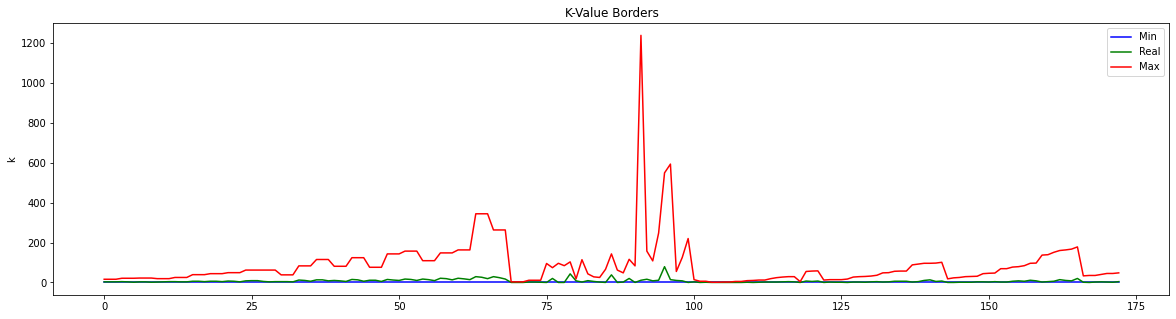

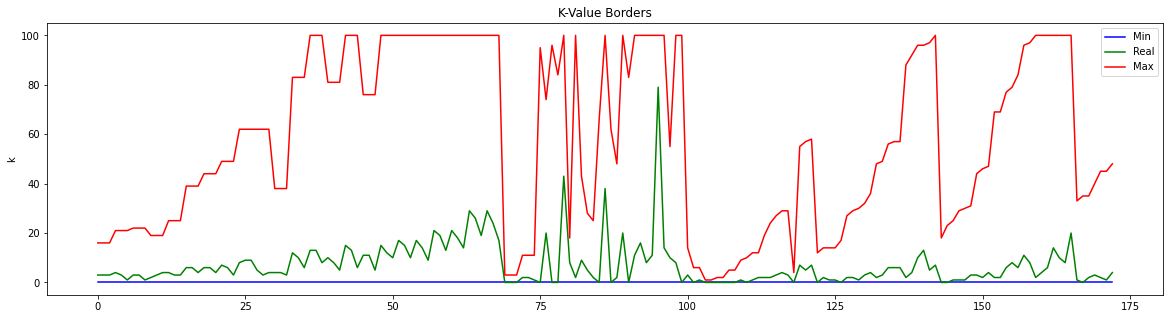

In [7]:
# K-Value Borders
plt.figure(figsize=(20,5))
plt.plot(dfMinMaxK["min"], c = 'blue', label="Min")
plt.plot(dfMinMaxK["real"], c = 'green', label="Real")
plt.plot(dfMinMaxK["max"], c = 'red', label="Max")
plt.title('K-Value Borders')
plt.ylabel('k')
plt.legend()
plt.savefig('plots/MinMaxKLinePlotCombined.png',  bbox_inches='tight')
plt.show()

# K-Value Borders cropped at 100
dfMinMaxK['max'] = dfMinMaxK['max'].where(dfMinMaxK['max'] <= 100, 100)
plt.figure(figsize=(20,5))
plt.plot(dfMinMaxK["min"], c = 'blue', label="Min")
plt.plot(dfMinMaxK["real"], c = 'green', label="Real")
plt.plot(dfMinMaxK["max"], c = 'red', label="Max")
plt.title('K-Value Borders')
plt.ylabel('k')
plt.legend()
plt.savefig('plots/MinMaxKLinePlotCombinedClipped.png',  bbox_inches='tight')
plt.show()